In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_pickle('Recipes_data_Course_Sim_Ingrs.pkl')

In [2]:
df.Ingredients[0]

['baking soda',
 'walnuts',
 'sugar',
 'allpurpose flour',
 'buttermilk',
 'wholewheat flour',
 'sugar',
 'bananas',
 'eggs',
 'margarine']

In [3]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x))
df

,Title,Ingredients,Type
0,Banana Whole Wheat Walnut Muffins,baking soda walnuts sugar allpurpose flour but...,Breakfast and Brunch
1,Basic Breakfast Muffins,vanilla bean applesauce allpurpose flour water...,Breakfast and Brunch
2,Bo's Low Fat Berry Muffins,sugar raspberries lemon allpurpose flour cinna...,Breakfast and Brunch
3,Buttermilk Pecan Waffles,baking soda allpurpose flour pecans buttermilk...,Breakfast and Brunch
4,Cate's Pumpkin Nut Bread,nutmeg baking soda allpurpose flour cinnamon p...,Breakfast and Brunch
...,...,...,...
4951,Pork and Scallion Wraps,hoisin sauce pork tenderloin soy sauce dark ga...,Appetizers
4952,Pork U Pine Meatballs,rice ground ham tomato sauce onions,Appetizers
4953,Portuguese Garlic Dip,mayonnaise worcestershire sauce garlic black p...,Appetizers
4954,Potato Skins with Cheese and Bacon,chives russet potatoes cheddar cheese sour cre...,Appetizers


In [4]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,Title,Ingredients,Type
0,Couscous with Fennel and Pinenuts,fennel bulb couscous pine nuts chives chicken ...,Side Dish
1,Chicken Florentine Casserole,light cream halfhalf italian sausage cream of ...,Main Dish
2,Low Fat Caesar Salad,romaine lettuce lemon garlic yogurt black pepp...,Side Dish
3,Easy Mediterranean Pasta Salad,sundried tomatoes olive oil extravirgin kalama...,Main Dish
4,Cheescake Pancakes with Berry-Lemon Syrup,lemon zest vanilla bean raspberries syrup butt...,Breakfast and Brunch
...,...,...,...
4951,Melanzane Sott'Olio,kosher salt japanese eggplants red wine vinega...,Appetizers
4952,Applesauce Oat Bran Muffins,egg whites sugar applesauce allpurpose flour c...,Breakfast and Brunch
4953,"Celery, Cucumber, Fennel and Radish Salad with...",red wine vinegar romaine lettuce celery olive ...,Side Dish
4954,Roasted Fingerling Potato with Balsamic Drizzling,garlic olive oil black pepper potatoes rosemar...,Side Dish


In [5]:
import numpy as np
np.unique(df.Type,return_counts=True)

(array(['Appetizers', 'Breakfast and Brunch', 'Dessert', 'Main Dish',
        'Side Dish'], dtype=object),
 array([991, 990, 991, 992, 992]))

In [6]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df['Ingredients'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
result_df = pd.concat([df, tfidf_df], axis=1)

tfidf_df

,accent,acorn,active,additives,adobo,aioli,alba,ale,alfredo,all,...,yeast,yellow,yogurt,yolks,your,yucca,zest,ziti,zucchini,zwieback
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.253944,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.314427,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df['Type'], test_size=0.2, random_state=4,stratify=df['Type'])

In [8]:
np.unique(y_train,return_counts=True)

(array(['Appetizers', 'Breakfast and Brunch', 'Dessert', 'Main Dish',
        'Side Dish'], dtype=object),
 array([793, 792, 793, 793, 793]))

In [9]:
np.unique(y_test,return_counts=True)

(array(['Appetizers', 'Breakfast and Brunch', 'Dessert', 'Main Dish',
        'Side Dish'], dtype=object),
 array([198, 198, 198, 199, 199]))

Accuracy with KNN: 0.5514112903225806


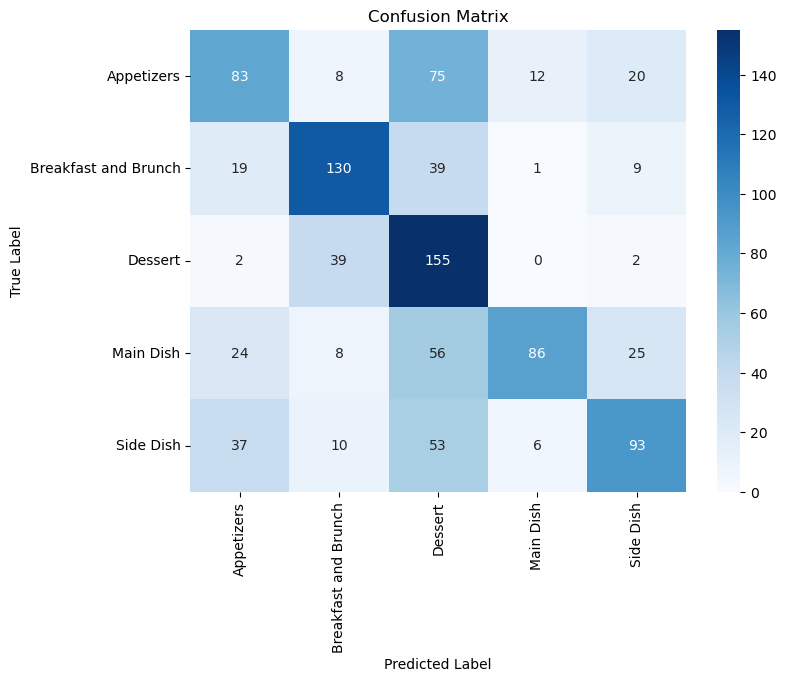

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy with KNN: {knn_accuracy}")

knn_cm = confusion_matrix(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.6522177419354839


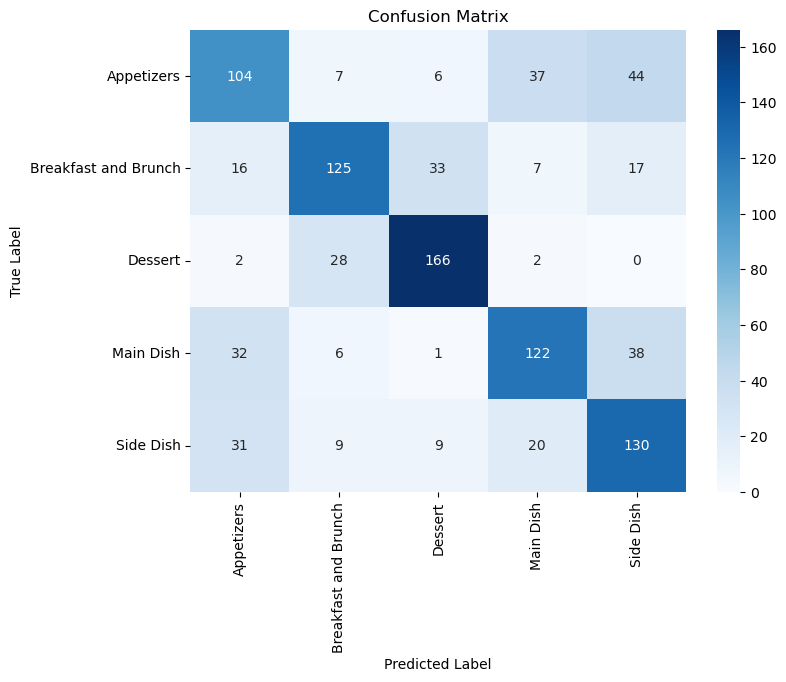

In [11]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy with SGD: 0.7046370967741935


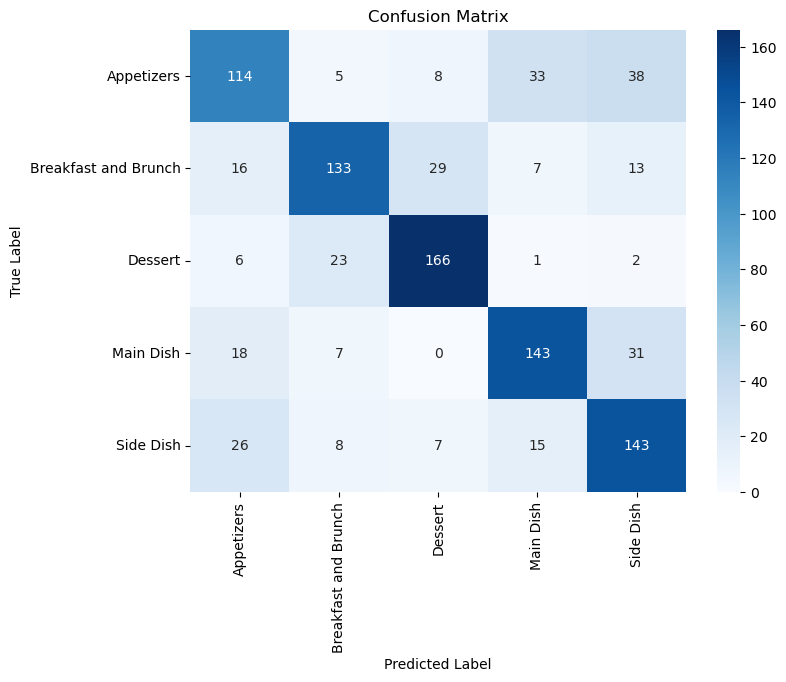

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='log_loss')

sgd_classifier.fit(X_train, y_train)

sgd_predictions = sgd_classifier.predict(X_test)

sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"Accuracy with SGD: {sgd_accuracy}")
cm = confusion_matrix(y_test,sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Best Hyperparameters: {'alpha': 0.001, 'max_iter': 500, 'penalty': 'l2'}
Accuracy with SGD (Best Hyperparameters): 0.6599496221662469


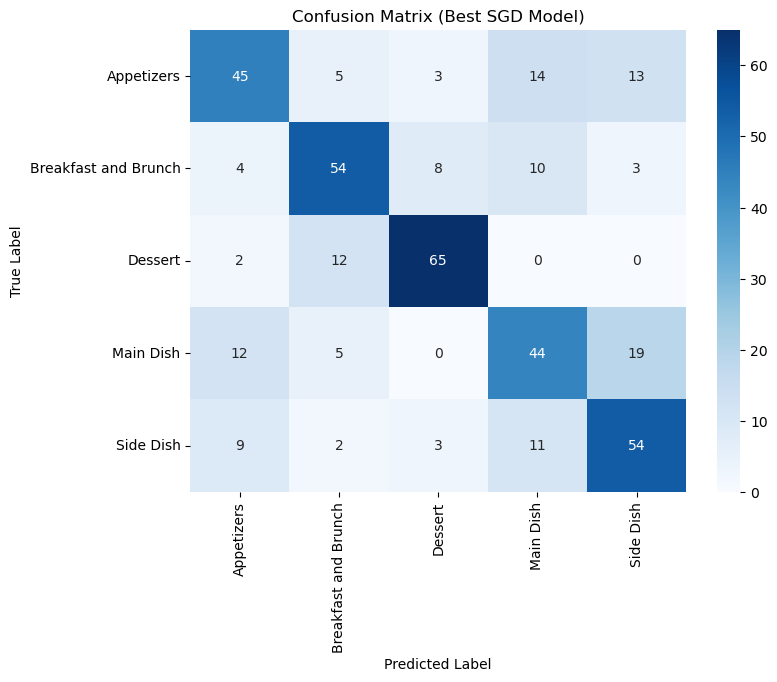

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [ 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [500,1000],
}

sgd_classifier = SGDClassifier(loss='log_loss', random_state=42)

grid_search = GridSearchCV(sgd_classifier, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_sgd_classifier = grid_search.best_estimator_
sgd_predictions = best_sgd_classifier.predict(X_val)

sgd_accuracy = accuracy_score(y_val, sgd_predictions)
print(f"Accuracy with SGD (Best Hyperparameters): {sgd_accuracy}")

cm = confusion_matrix(y_val, sgd_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_sgd_classifier.classes_, yticklabels=best_sgd_classifier.classes_)
plt.title('Confusion Matrix (Best SGD Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [15]:
sgd_predictions = best_sgd_classifier.predict(X_test)
sgd_accuracy = accuracy_score(y_test, sgd_predictions)
print(f"Accuracy with SGD (Best Hyperparameters): {sgd_accuracy}")


Accuracy with SGD (Best Hyperparameters): 0.6663306451612904


Accuracy with NB: 0.6743951612903226


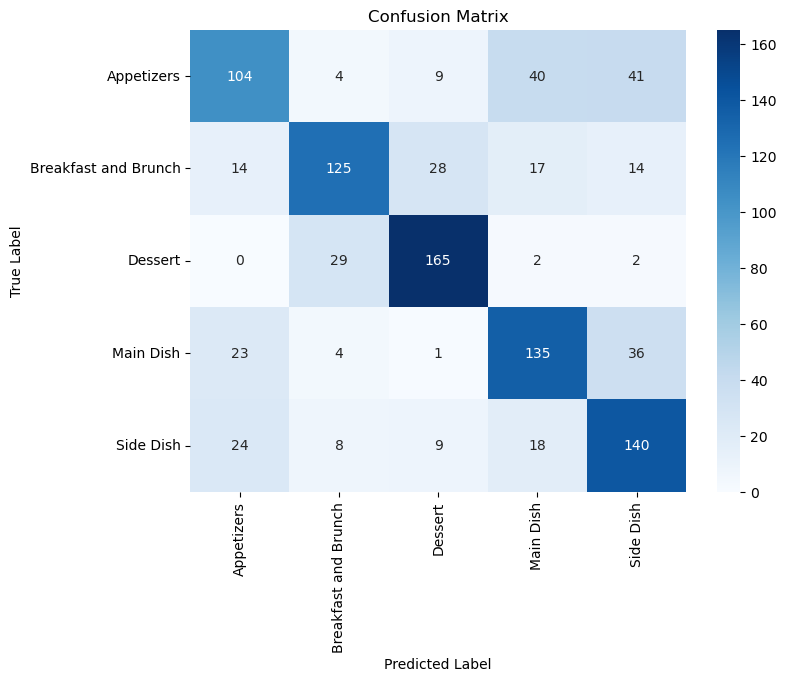

In [16]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

nb_predictions = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy with NB: {nb_accuracy}")
cm = confusion_matrix(y_test,nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy with XGBoost: 0.6945564516129032


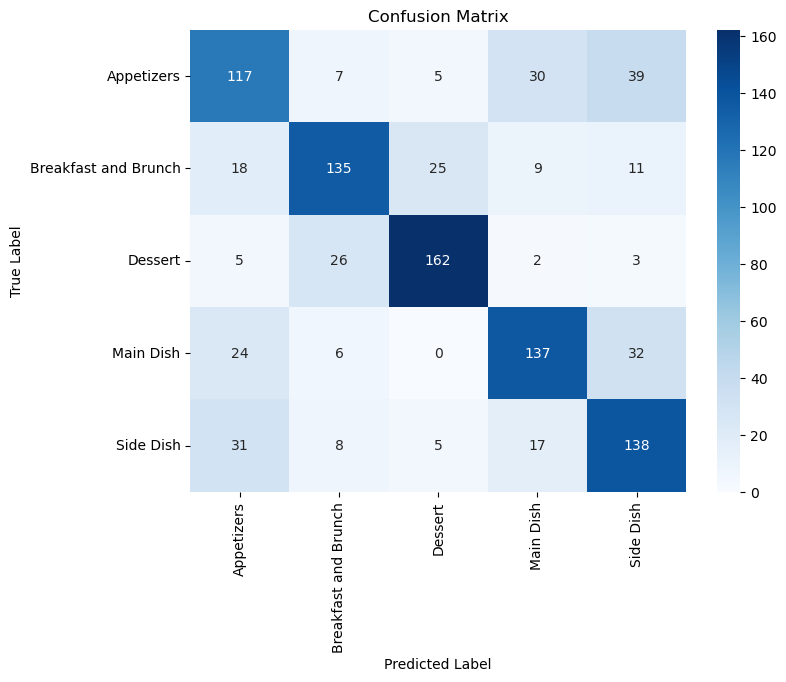

In [17]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train_encoded)

xgb_predictions = xgb_classifier.predict(X_test)

xgb_accuracy = accuracy_score(y_test_encoded, xgb_predictions)
print(f"Accuracy with XGBoost: {xgb_accuracy}")
cm = confusion_matrix(y_test_encoded,xgb_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
import pickle

In [30]:
with open('sgd_classifier_Course.pkl', 'wb') as model_file:
    pickle.dump(sgd_classifier, model_file)

In [31]:
with open('sgd_classifier_Course.pkl', 'rb') as model_file:
     sgd_classifier = pickle.load(model_file)

In [32]:
new_ingredients = ['flour','sugar']

new_ingredients_str = ' '.join(new_ingredients)

new_tfidf_features = tfidf_vectorizer.transform([new_ingredients_str])
new_tfidf_features
class_probabilities = sgd_classifier.predict_proba(new_tfidf_features)

for class_label, probabilities in zip(sgd_classifier.classes_, class_probabilities[0]):
    print(f"Probability for {class_label}: {probabilities:.4f}")

sgd_classifier.predict(new_tfidf_features)


Probability for Appetizers: 0.0176
Probability for Breakfast and Brunch: 0.1257
Probability for Dessert: 0.8167
Probability for Main Dish: 0.0129
Probability for Side Dish: 0.0271


array(['Dessert'], dtype='<U20')

In [28]:
top_indices = [i for i, prob in enumerate(class_probabilities[0]) if prob > 0.30]

top_classes = sgd_classifier.classes_[top_indices]

if len(top_classes)==0:
    top_indices = class_probabilities.argsort()[0][-1:][::-1]
    top_classes = sgd_classifier.classes_[top_indices]
    
top_classes

array(['Dessert'], dtype='<U20')